1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats



Simple Linear Regression is a statistics used to model the relationship between two variables: one independent variable (predictor) and one dependent variable (outcome). The purpose of it is to find the best-fitting regression line through the data points, to determine to what extent are the two variable associated.

The equation to express simple linear regression is: Y=β0+β1X+ε

Where X is the independent variable(predictor) variable that is used to predict the dependent varible(outcome) Y. β1 is the slope coefficient of the linear regression represents the change in Y for a 1 unit increase in X; While β0 is the Y intercept of the regression line represents Y when X is zero. Lastly, the error term ε shows the difference between the observed values and the predicted values.

Becasue we assemr the error term follows a normal distribution around the mean 0, when we collect data and fit a regression line, the resulting predicted values (Ŷ) form a distribution around the true relationship defined by the regression equation.

Predictor (X): [3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578]
Error terms (ε): [ 0.08704707 -0.29900735  0.09176078 -1.98756891 -0.21967189  0.35711257
  1.47789404 -0.51827022 -0.8084936  -0.50175704]
Outcome (Y): [13.32325063 30.22242184 24.05157903 17.97218561  6.46088733  7.03694818
  5.22040241 27.46701415 19.22495675 22.74042029]


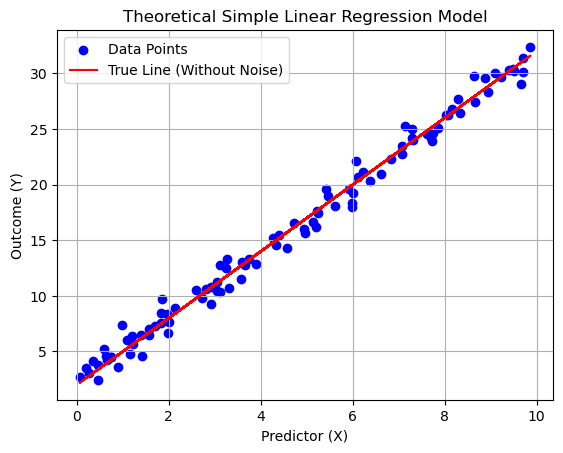

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 100  # number of samples
beta0 = 2.0  # intercept
beta1 = 3.0  # slope
sigma = 1.0   # standard deviation for error

# Generate predictor variable (X) from a uniform distribution
x = stats.uniform.rvs(loc=0, scale=10, size=n)  # loc is the lower bound, scale is the width

# Generate error terms (ε) from a normal distribution
errors = np.random.normal(loc=0, scale=sigma, size=n)

# Calculate the outcome variable (Y) using the Simple Linear Regression model
y = beta0 + beta1 * x + errors

# Display the results
print("Predictor (X):", x[:10])  # Show first 10 predictors
print("Error terms (ε):", errors[:10])  # Show first 10 errors
print("Outcome (Y):", y[:10])  # Show first 10 outcomes

# Plotting the data
plt.scatter(x, y, label='Data Points', color='blue')
plt.plot(x, beta0 + beta1 * x, color='red', label='True Line (Without Noise)')
plt.title('Theoretical Simple Linear Regression Model')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.legend()
plt.grid()
plt.show()


2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

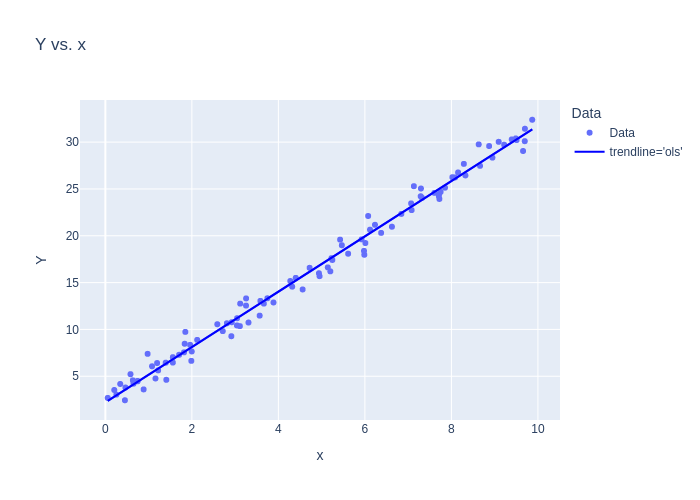

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf  # This library is for statistical modeling, specifically for fitting linear models
import plotly.express as px  # This is a plotting library for creating interactive visualizations

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 100  # number of samples
beta0 = 2.0  # intercept
beta1 = 3.0  # slope
sigma = 1.0   # standard deviation for error

# Generate predictor variable (X) from a uniform distribution
x = np.random.uniform(0, 10, size=n)

# Generate error terms (ε) from a normal distribution
errors = np.random.normal(loc=0, scale=sigma, size=n)

# Calculate the outcome variable (Y) using the Simple Linear Regression model
y = beta0 + beta1 * x + errors

# Combine x and y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': y})

# Fit the Simple Linear Regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # This line specifies the model using the formula interface
fitted_model = model_data_specification.fit()  # This line fits the model to the data

# Plotting the results
df['Data'] = 'Data'  # Hack to add data to legend 
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')  # Creates a scatter plot with a fitted trendline

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")  # Adds the fitted regression line to the plot

fig.show(renderer="png") 


Chatbot history for Question 1 and 2: https://chatgpt.com/share/672cfd3b-63a4-8004-a199-22de091db969

3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

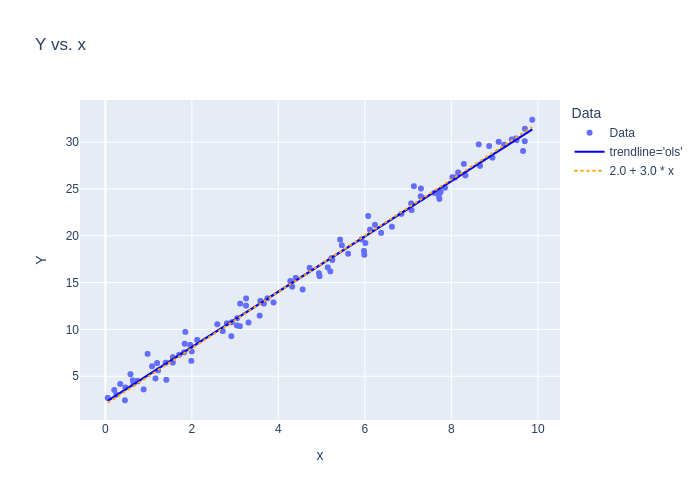

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf  # For statistical modeling
import plotly.express as px  # For interactive plotting

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 100  # number of samples
beta0 = 2.0  # intercept
beta1 = 3.0  # slope
sigma = 1.0   # standard deviation for error

# Generate predictor variable (X) from a uniform distribution
x = np.random.uniform(0, 10, size=n)

# Generate error terms (ε) from a normal distribution
errors = np.random.normal(loc=0, scale=sigma, size=n)

# Calculate the outcome variable (Y) using the Simple Linear Regression model
y = beta0 + beta1 * x + errors

# Combine x and y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': y})

# Fit the Simple Linear Regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # Specify the model
fitted_model = model_data_specification.fit()  # Fit the model

# Plotting the results
df['Data'] = 'Data'  # Hack to add data to legend 
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')  # Scatter plot with trendline

# Add the fitted regression line from the model
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")  # Fitted line

# Add the theoretical line from Question 1
x_range = np.array([df['x'].min(), df['x'].max()])  # Range for x
y_line = beta0 + beta1 * x_range  # Calculate y for the theoretical line
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                line=dict(dash='dot', color='orange'))  # Theoretical line

fig.show(renderer="png") 


The Theoretical Model line represents the ideal relationship based on a defined mathematical equation. In this simulation, Y is calculated directly from the values of X, using a specific intercept and slope, and then modified by random error terms. 

The Fitted Model line represents the relationship derived from actual sampled data. After generating random samples, we fit a regression model to estimate the best linear relationship based on the observed data points. The fitted line reflects how well our model captures the relationship. This line may not perfectly align with the theoretical line due to the variations in the random samples.

Chatbot history for Question 3: https://chatgpt.com/share/672d01b9-0724-8004-bb1c-ad5c0f694cc2

4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

After fitting the model, the estimated parameters (coefficients) are stored in fitted_model.params. This includes the intercept and the coefficients for each independent variable. The fitted values are calculated by substituting the observed values of the independent variables into the regression equation using the estimated parameters. When you access fitted_model.fittedvalues, it performs this calculation for each observation in your dataset, resulting in a series of predicted values that correspond to the input data.

8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

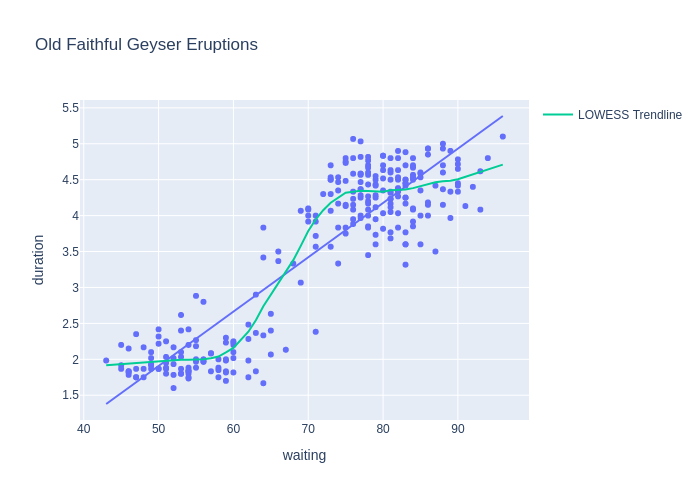

In [19]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

In [17]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        18:17:22   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Null Hypothesis (H0): There is no linear association between waiting time and eruption duration.

The p-value for the waiting coefficient is 0.000 (noted as P>|t|), which is extremely low. We reject the null hypothesis with a p-value of < 0.001, meaning we have very strong evidence against the null hypothesis. This suggests a significant linear association between waiting time and eruption duration in the Old Faithful Geyser dataset.

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


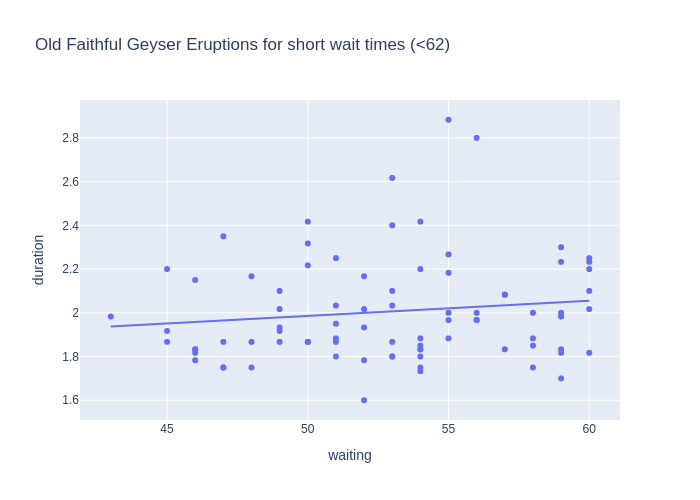

In [21]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

Null Hypothesis (H0): There is no linear association between waiting time and eruption duration (β = 0).

Given that the p-value is 0.238: We fail to reject the null hypothesis with a p-value of 0.238. This indicates that there is no evidence against the null hypothesis of no linear association between waiting time and eruption duration in the restricted dataset of short wait times.

11. 11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length


where we use  (rather than ) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications

smf.ols('duration ~ waiting', data=old_faithful)
smf.ols('duration ~ waiting', data=old_faithful[short_wait])
smf.ols('duration ~ waiting', data=old_faithful[long_wait])
and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


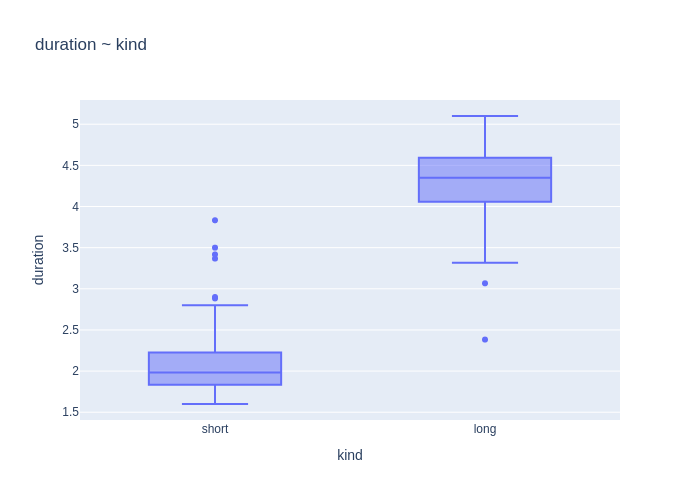

In [22]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

The original model uses a continuous independent variable (waiting time), represents how each additional minute affects eruption duration. The new model with an indicator variable simplifies the relationship by categorizing wait times, making it easier to compare average durations between two distinct groups. In the indicator variable model, the focus shifts to comparing means between groups, making it more intuitive to understand the differences in average durations without delving into the continuous relationship.

Null Hypothesis (H0): There is no difference in average eruption duration between short and long wait times

The P-value we get is 0.000, which is extremly small, so we reject the null hypothesis, indicating evidence of a significant difference in eruption durations based on waiting time category.

Chatbot history for question 9 and 11:

We discussed analyzing the relationship between waiting times and eruption durations of the Old Faithful geyser using various regression models. Initially, we examined a continuous relationship with the model duration ~ waiting for the full dataset and subsets for short and long wait times. After defining short wait times as less than 68 minutes, we created an indicator variable to categorize wait times into "short" and "long." This new model simplifies the analysis by comparing average eruption durations between the two groups. We concluded by stating the null hypothesis of no difference between the groups and emphasized how the indicator model allows for straightforward hypothesis testing, focusing on mean differences rather than continuous relationships, with statistical significance determined by the p-value derived from the indicator variable model.